In [1]:
import pandas as pd
import numpy as np

In [2]:
#Loading both files into pandas dataframe
companies = pd.read_csv('companies.txt', sep='\t', encoding = 'ISO-8859-1')
rounds2=pd.read_csv('rounds2.csv',encoding='ISO-8859-1')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
#Lowering cases in both columns of tables for easyness in joining and calculating uniqueness in records
companies['permalink'] = pd.Series(map(lambda x: x.lower() , companies['permalink']))
rounds2['company_permalink']= pd.Series(map(lambda x: x.lower(), rounds2['company_permalink']))

In [5]:
#computing unique records in companies table
companies['permalink'].nunique()

66368

In [6]:
#computing unique records in rounds2 table
rounds2['company_permalink'].nunique()

66370

In [7]:
#Renaming column for a better join
rounds2= rounds2.rename(columns = {"company_permalink": "permalink"})

In [8]:
#Joining two tables with identical column and values
master_frame=pd.merge(rounds2,companies,on='permalink',how='inner')
master_frame.head()

,permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [9]:
#Getting total records 
len(master_frame.index)

114942

In [10]:
#Now checking missing data
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink                   0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.33
category_list               2.96
status                      0.00
country_code                7.54
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [11]:
#cleaning data
#removing unnecessary columns
master_frame = master_frame.drop('funding_round_permalink', axis=1)
master_frame = master_frame.drop('funded_at', axis=1)
master_frame = master_frame.drop('funding_round_code', axis=1)
master_frame = master_frame.drop('homepage_url', axis=1)
master_frame = master_frame.drop('state_code', axis=1)
master_frame = master_frame.drop('region', axis=1)
master_frame = master_frame.drop('city', axis=1)
master_frame = master_frame.drop('founded_at', axis=1)


In [12]:
#Checking for null
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink              0.00
funding_round_type     0.00
raised_amount_usd     17.39
name                   0.00
category_list          2.96
status                 0.00
country_code           7.54
dtype: float64

In [13]:
#records in table
len(master_frame.index)

114942

In [14]:
#Avoiding/Excluding rows which does not have raised_amount_usd value as will not contribute in further analysis
master_frame= master_frame[pd.notnull(master_frame['raised_amount_usd'])]

In [15]:
#Avoiding/Excluding rows which do not have sufficient data for further analysis and imputing might hamper results
master_frame= master_frame[pd.notnull(master_frame['country_code'])]
master_frame= master_frame[pd.notnull(master_frame['category_list'])]


In [16]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

permalink             0.0
funding_round_type    0.0
raised_amount_usd     0.0
name                  0.0
category_list         0.0
status                0.0
country_code          0.0
dtype: float64

In [17]:
#Cleaner dataset
len(master_frame.index)

88529

In [18]:
#Calulating avg of each type of funding as mean/avg is the most representative investment amount
funding_round_type_group=master_frame.groupby('funding_round_type')


In [19]:
type_funding=funding_round_type_group['raised_amount_usd'].mean().sort_values(ascending=False).astype('int')
type_funding

funding_round_type
post_ipo_debt            169451789
secondary_market          84438532
private_equity            73938486
post_ipo_equity           66077058
debt_financing            17167653
undisclosed               15891661
venture                   11724222
grant                      4512698
product_crowdfunding       1353226
convertible_note           1337186
angel                       971573
seed                        747793
equity_crowdfunding         509897
non_equity_assistance       480753
Name: raised_amount_usd, dtype: int32

In [20]:
#Records now in master dataframe
len(master_frame.index)

88529

In [21]:
master_for_plot=master_frame.loc[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity'])]

In [22]:
#Importing libraries for plots
import matplotlib.pyplot as plt
import seaborn as sns
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


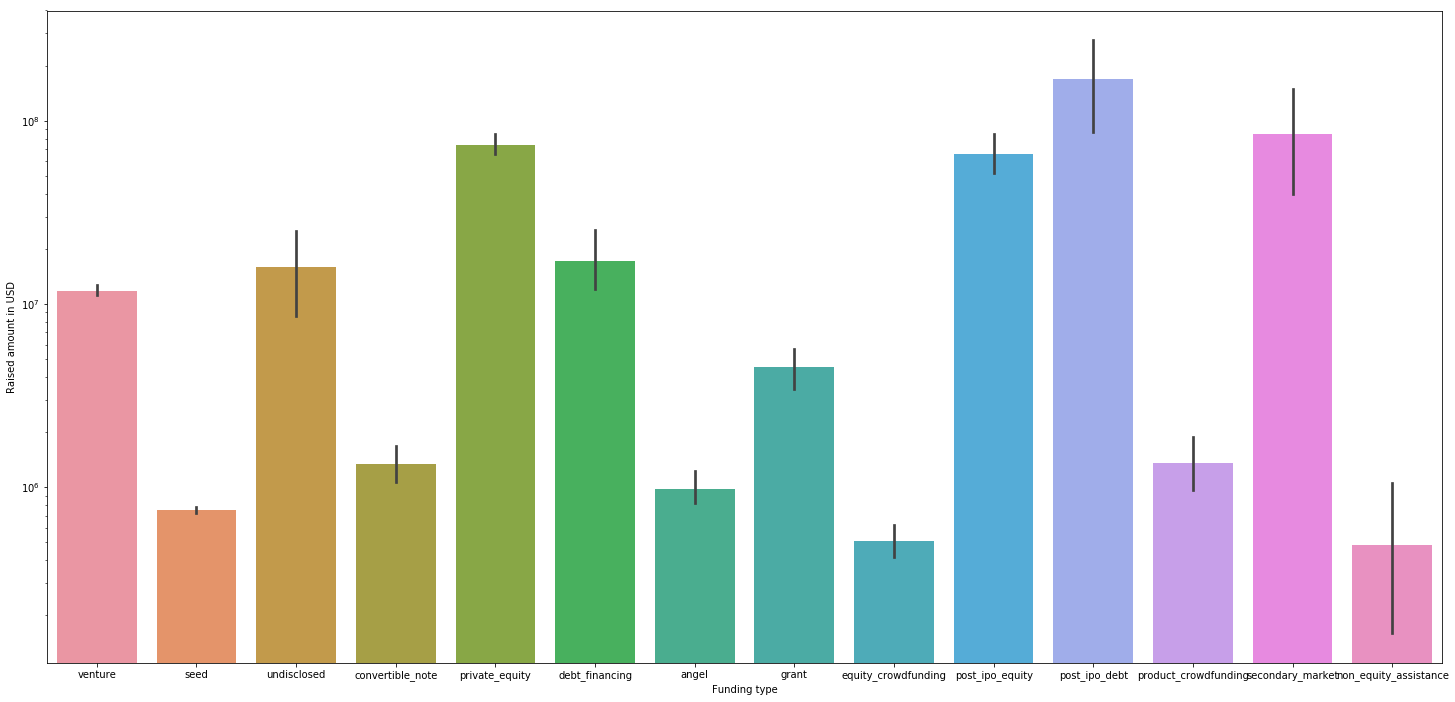

In [23]:
#Showing funding type with investment to identify 5-15M type
plt.rc('font', size=MEDIUM_SIZE)
plt.figure(num=None,figsize=(25,12))
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_frame,estimator=np.mean)
plt.xlabel('Funding type')
plt.ylabel('Raised amount in USD')
plt.yscale('log')
plt.show()

In [24]:
#Filtering venture type records
master_frame = master_frame.loc[master_frame['funding_round_type']=='venture']
master_frame.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,operating,USA
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,operating,USA


In [25]:
#Records after filtering in master dataframe
len(master_frame)

47809

In [26]:
master_frame['country_code'].head()

0     IND
4     CHN
8     CAN
10    USA
11    USA
Name: country_code, dtype: object

In [27]:
#extracting the primary sector as first element of every value(separated by |) of a cell 
master_frame['primary_sector']=master_frame['category_list'].apply(lambda v: v.split('|')[0].lower())
master_frame['primary_sector'].head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


0             media
4       curated web
8     biotechnology
10        analytics
11        analytics
Name: primary_sector, dtype: object

In [28]:
#grouping by country code and seeing the country funded highest funds 
top9=master_frame
top9_grouped=top9.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).astype('int64')
top9_grouped.head()

country_code
USA    420068029342
CHN     39338918773
GBR     20072813004
IND     14261508718
CAN      9482217668
Name: raised_amount_usd, dtype: int64

In [29]:
top9_grouped.index

Index(['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN', 'SWE',
       'NLD', 'CHE', 'SGP', 'ESP', 'BRA', 'IRL', 'RUS', 'AUS', 'DNK', 'FIN',
       'BEL', 'NOR', 'KOR', 'MYS', 'HKG', 'TWN', 'AUT', 'TUR', 'ITA', 'NZL',
       'LUX', 'ARE', 'ARG', 'BMU', 'IDN', 'EGY', 'ZAF', 'MEX', 'NGA', 'CZE',
       'PRT', 'POL', 'PHL', 'THA', 'COL', 'EST', 'ISL', 'LTU', 'PAK', 'CYP',
       'CYM', 'TAN', 'KEN', 'VNM', 'GIB', 'HUN', 'GHA', 'CHL', 'MAF', 'JOR',
       'ARM', 'LVA', 'URY', 'ROM', 'UKR', 'MLT', 'KNA', 'KWT', 'LIE', 'MNE',
       'SVN', 'BGR', 'KAZ', 'GRC', 'BAH', 'TTO', 'SVK', 'BGD', 'LBN', 'GGY',
       'TUN', 'SEN', 'HRV', 'UGA', 'PER', 'BWA', 'LAO', 'PAN', 'MAR', 'MUS',
       'PRI', 'ECU', 'MCO', 'SAU', 'CMR', 'GTM', 'MMR'],
      dtype='object', name='country_code')

In [30]:
#From top 9 choosing 3 countries which are english speaking by refering through wiki link provided
#USA,GBR,IND
#Referred wiki links for list of countries having english as official language and iso-3166 country code to manually check 
#https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language
#https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes
#Creating a list of countries_codes in which official language is english by referring these links:
eng_country_codes=['AUS','NZL','GBR','USA','ATG','BHS','BRB','BLZ','BWA','BDI','CMR','CAN','COK','DMA','SWZ','FJI','GMB','GHA','GRD','GUY','IND','IRL','JAM','KEN','KIR','LSO','LBR','MWI','MLT','MHL','MUS','FSM','NAM','NRU','NGA','NIU','PAK','PLW','PNG','PHL','RWA','KNA','LCA','VCT','WSM','SYC','SLE','SGP','SLB','ZAF','SSD','SDN','TZA','TON','TTO','TUV','UGA','VUT','ZMB','ZWE']
top9_grouped.loc[top9_grouped.index.isin(eng_country_codes)]

country_code
USA    420068029342
GBR     20072813004
IND     14261508718
CAN      9482217668
SGP      2793917856
IRL      1669285543
AUS      1319028698
NZL       448316383
ZAF       233713106
NGA       183440000
PHL       114499742
PAK        83125000
KEN        53940000
GHA        31200000
MLT        17728300
KNA        15000000
TTO         8500000
UGA         2500000
BWA         2250000
MUS         1500000
CMR          359561
Name: raised_amount_usd, dtype: int64

In [31]:
top9.head(10)

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,media
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN,curated web
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,biotechnology
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,operating,USA,analytics
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,operating,USA,analytics
12,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,operating,USA,analytics
22,/organization/1-mainstream,venture,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps
28,/organization/10-minutes-with,venture,4000000.0,10 Minutes With,Education,operating,GBR,education
34,/organization/1000memories,venture,2520000.0,1000memories,Curated Web,acquired,USA,curated web
38,/organization/1000museums-com,venture,265940.0,1000museums.com,Curated Web,operating,USA,curated web


In [32]:
master_frame['category_list'].head(10)

0                                Media
4                          Curated Web
8                        Biotechnology
10                           Analytics
11                           Analytics
12                           Analytics
22    Apps|Cable|Distribution|Software
28                           Education
34                         Curated Web
38                         Curated Web
Name: category_list, dtype: object

In [33]:
#Loading mapping file
mapping = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [34]:
len(mapping.index)

688

In [35]:
master_frame.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,media
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN,curated web
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,biotechnology
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,operating,USA,analytics
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,operating,USA,analytics


In [36]:
#Removing nan entry
mapping = mapping[pd.notnull(mapping['category_list'])]

In [37]:
len(mapping.index)

687

In [38]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0


In [39]:
def label (row):
    if row['Automotive & Sports'] == 1 :
        return 'Automotive & Sports'
    if row['Blanks']:
        return 'Blanks'
    if row['Cleantech / Semiconductors'] == 1 :
        return 'Cleantech / Semiconductors'
    if row['Entertainment'] == 1:
        return 'Entertainment'
    if row['Health']  == 1:
        return 'Health'
    if row['Manufacturing'] == 1:
        return 'Manufacturing'
    if row['News, Search and Messaging'] == 1:
        return 'News, Search and Messaging'
    if row['Others'] == 1:
        return 'Others'
    if row['Social, Finance, Analytics, Advertising'] == 1:
        return 'Social, Finance, Analytics, Advertising'
   

In [40]:
main_sector=mapping.apply(lambda row: str(label(row)), axis=1)

In [41]:
primary_sector=mapping['category_list'].str.lower()


In [42]:
len(primary_sector)

687

In [43]:
primary_sector.sort_values(ascending=True)

471                 0notechnology
472    0tural language processing
473              0tural resources
474                     0vigation
1                              3d
2                     3d printing
3                   3d technology
22                       a0lytics
4                      accounting
5                active lifestyle
6                    ad targeting
7              advanced materials
8                adventure travel
9                     advertising
10          advertising exchanges
11           advertising networks
12          advertising platforms
13                         advice
14                      aerospace
15                    agriculture
16          air pollution control
17                     algorithms
18                    all markets
19                   all students
20            alter0tive medicine
21                         alumni
23                        android
24                         angels
25                    animal feed
26     anythin

In [44]:
#Looks like file had 0s instead of na ,Replacing na by 0 (tried merge but records difference islarger if this is not replaced)
primary_sector=primary_sector.apply(lambda x: x.replace('0', 'na'))
primary_sector.sort_values(ascending=True)

1                                      3d
2                             3d printing
3                           3d technology
4                              accounting
5                        active lifestyle
6                            ad targeting
7                      advanced materials
8                        adventure travel
9                             advertising
10                  advertising exchanges
11                   advertising networks
12                  advertising platforms
13                                 advice
14                              aerospace
15                            agriculture
16                  air pollution control
17                             algorithms
18                            all markets
19                           all students
20                   alternative medicine
21                                 alumni
22                              analytics
23                                android
24                                

In [45]:
#Making new dataframe for evaluation
master_mapping=pd.DataFrame({'primary_sector':primary_sector.values, 'main_sector':main_sector.values})
master_mapping.head()

,primary_sector,main_sector
0,3d,Manufacturing
1,3d printing,Manufacturing
2,3d technology,Manufacturing
3,accounting,"Social, Finance, Analytics, Advertising"
4,active lifestyle,Health


In [46]:
#Filtering records of only top3 countries which speak english
english_speaking = top9[top9['country_code'].isin(['USA', 'GBR', 'IND'])]
english_speaking.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False)
english_speaking.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,media
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,operating,USA,analytics
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,operating,USA,analytics
12,/organization/0xdata,venture,8900000.0,H2O.ai,Analytics,operating,USA,analytics
22,/organization/1-mainstream,venture,5000000.0,1 Mainstream,Apps|Cable|Distribution|Software,acquired,USA,apps


In [47]:
len(english_speaking)

38803

In [48]:
len(master_mapping)

687

In [49]:
#Joining two tables by primary sector
english_speaking = pd.merge(english_speaking, master_mapping, how='inner', on='primary_sector')


In [50]:
english_speaking.head(15)

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,media,Entertainment
1,/organization/90min,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
2,/organization/90min,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
3,/organization/90min,venture,18000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
4,/organization/all-def-digital,venture,5000000.0,All Def Digital,Media,operating,USA,media,Entertainment
5,/organization/audiosocket,venture,650000.0,Audiosocket,Media|Music|Technology,operating,USA,media,Entertainment
6,/organization/audiosocket,venture,750000.0,Audiosocket,Media|Music|Technology,operating,USA,media,Entertainment
7,/organization/audiosocket,venture,1582300.0,Audiosocket,Media|Music|Technology,operating,USA,media,Entertainment
8,/organization/babble,venture,2000000.0,Babble,Media|News|Parenting,acquired,USA,media,Entertainment
9,/organization/babble,venture,1250000.0,Babble,Media|News|Parenting,acquired,USA,media,Entertainment


In [51]:
len(english_speaking)

38788

In [52]:
#Creating three dataframes with limit of raised_amt >=5M and <=15M with appropriate country code
D1=english_speaking[(english_speaking['raised_amount_usd']>=5000000.0) & (english_speaking['raised_amount_usd'] <= 15000000.0) & (english_speaking['country_code'] == 'USA')]

In [53]:
D1.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
4,/organization/all-def-digital,venture,5000000.0,All Def Digital,Media,operating,USA,media,Entertainment
14,/organization/chefs-feed,venture,5000000.0,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,media,Entertainment
20,/organization/huffingtonpost,venture,5000000.0,The Huffington Post,Media|News|Publishing,acquired,USA,media,Entertainment
21,/organization/huffingtonpost,venture,5000000.0,The Huffington Post,Media|News|Publishing,acquired,USA,media,Entertainment
25,/organization/matchmine,venture,10000000.0,MatchMine,Media|News|Reviews and Recommendations,closed,USA,media,Entertainment


In [54]:
D2=english_speaking[(english_speaking['raised_amount_usd']>=5000000.0) & (english_speaking['raised_amount_usd'] <= 15000000.0) & (english_speaking['country_code'] == 'GBR')]

In [55]:
D2.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
1,/organization/90min,venture,15000000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
2,/organization/90min,venture,5800000.0,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
91,/organization/aihit,venture,5500000.0,aiHit,Analytics|Artificial Intelligence|Business Int...,acquired,GBR,analytics,"Social, Finance, Analytics, Advertising"
219,/organization/brandwatch,venture,6000000.0,Brandwatch,Analytics|Social Media,operating,GBR,analytics,"Social, Finance, Analytics, Advertising"
435,/organization/digital-shadows,venture,8000000.0,Digital Shadows,Analytics|Cyber Security|Financial Services|In...,operating,GBR,analytics,"Social, Finance, Analytics, Advertising"


In [56]:
D3=english_speaking[(english_speaking['raised_amount_usd']>=5000000.0) & (english_speaking['raised_amount_usd'] <= 15000000.0) & (english_speaking['country_code'] == 'IND')]

In [57]:
D3.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,media,Entertainment
454,/organization/eka-software-solutions,venture,6000000.0,Eka Software Solutions,Analytics|Logistics|Software|Storage|Supply Ch...,operating,IND,analytics,"Social, Finance, Analytics, Advertising"
455,/organization/eka-software-solutions,venture,10000000.0,Eka Software Solutions,Analytics|Logistics|Software|Storage|Supply Ch...,operating,IND,analytics,"Social, Finance, Analytics, Advertising"
723,/organization/loginext-solutions,venture,10000000.0,LogiNext Solutions,Analytics|Big Data Analytics|Data Visualizatio...,operating,IND,analytics,"Social, Finance, Analytics, Advertising"
741,/organization/manthan-systems,venture,5700000.0,Manthan Systems,Analytics|Big Data Analytics|Business Intellig...,operating,IND,analytics,"Social, Finance, Analytics, Advertising"


In [58]:
len(english_speaking.index)

38788

In [59]:
#printing counts of each set
print('Count for D1={0} , Count for D2={1} ,Count for D3={2}'.format(D1['raised_amount_usd'].count(),D2['raised_amount_usd'].count(),D3['raised_amount_usd'].count()))

Count for D1=12063 , Count for D2=621 ,Count for D3=328


In [60]:
#printing total investments of each set
print('Total amount of investment in USA:{0} , GBR:{1}, IND:{2}'.format(D1['raised_amount_usd'].sum().astype('int64'),D2['raised_amount_usd'].sum().astype('int64'),D3['raised_amount_usd'].sum().astype('int64')))

Total amount of investment in USA:107757097294 , GBR:5379078691, IND:2949543602


In [61]:
D1.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
4,/organization/all-def-digital,venture,5000000.0,All Def Digital,Media,operating,USA,media,Entertainment
14,/organization/chefs-feed,venture,5000000.0,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,media,Entertainment
20,/organization/huffingtonpost,venture,5000000.0,The Huffington Post,Media|News|Publishing,acquired,USA,media,Entertainment
21,/organization/huffingtonpost,venture,5000000.0,The Huffington Post,Media|News|Publishing,acquired,USA,media,Entertainment
25,/organization/matchmine,venture,10000000.0,MatchMine,Media|News|Reviews and Recommendations,closed,USA,media,Entertainment


In [62]:
#Making general groups of each type
groupbyD1=D1.groupby('main_sector')
groupbyD2=D2.groupby('main_sector')
groupbyD3=D3.groupby('main_sector')



In [63]:
#Checking expenditure in each sector per country code
usa_top_sectors=groupbyD1['raised_amount_usd'].count().sort_values(ascending=False).head(5)
usa_top_sectors

main_sector
Others                                     2950
Social, Finance, Analytics, Advertising    2714
Cleantech / Semiconductors                 2350
News, Search and Messaging                 1583
Health                                      909
Name: raised_amount_usd, dtype: int64

In [64]:
gbr_top_sectors=groupbyD2['raised_amount_usd'].count().sort_values(ascending=False).head(5)
gbr_top_sectors

main_sector
Others                                     147
Social, Finance, Analytics, Advertising    133
Cleantech / Semiconductors                 130
News, Search and Messaging                  73
Entertainment                               56
Name: raised_amount_usd, dtype: int64

In [65]:
ind_top_sectors=groupbyD3['raised_amount_usd'].count().sort_values(ascending=False).head(5)
ind_top_sectors

main_sector
Others                                     110
Social, Finance, Analytics, Advertising     60
News, Search and Messaging                  52
Entertainment                               33
Manufacturing                               21
Name: raised_amount_usd, dtype: int64

In [66]:
D1.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
4,/organization/all-def-digital,venture,5000000.0,All Def Digital,Media,operating,USA,media,Entertainment
14,/organization/chefs-feed,venture,5000000.0,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,media,Entertainment
20,/organization/huffingtonpost,venture,5000000.0,The Huffington Post,Media|News|Publishing,acquired,USA,media,Entertainment
21,/organization/huffingtonpost,venture,5000000.0,The Huffington Post,Media|News|Publishing,acquired,USA,media,Entertainment
25,/organization/matchmine,venture,10000000.0,MatchMine,Media|News|Reviews and Recommendations,closed,USA,media,Entertainment


In [67]:
#Simultaneously calculating which company received highest investment in sector(1st) mentioned
pivot_D1_first=D1.loc[(D1['main_sector']=='Others')].pivot_table(values = 'raised_amount_usd',index = ['permalink'], aggfunc = 'sum' )

print(pivot_D1_first.sort_values(by=['raised_amount_usd'],ascending=False).head(1))

                           raised_amount_usd
permalink                                   
/organization/virtustream         64300000.0


In [68]:
pivot_D2_first=D2.loc[(D2['main_sector']=='Others')].pivot_table(values = 'raised_amount_usd',index = ['permalink'], aggfunc = 'sum' )

print(pivot_D2_first.sort_values(by=['raised_amount_usd'],ascending=False).head(1))

                              raised_amount_usd
permalink                                      
/organization/electric-cloud         37000000.0


In [69]:
pivot_D3_first=D3.loc[(D3['main_sector']=='Others')].pivot_table(values = 'raised_amount_usd',index = ['permalink'], aggfunc = 'sum' )

print(pivot_D3_first.sort_values(by=['raised_amount_usd'],ascending=False).head(1))

                            raised_amount_usd
permalink                                    
/organization/firstcry-com         39000000.0


In [70]:
#Simultaneously calculating which company received highest investment in sector(2nd) mentioned
pivot_D1_second=D1.loc[(D1['main_sector']=='Social, Finance, Analytics, Advertising')].pivot_table(values = 'raised_amount_usd',index = ['permalink'], aggfunc = 'sum' )
print(pivot_D1_second.sort_values(by=['raised_amount_usd'],ascending=False).head(1))


                           raised_amount_usd
permalink                                   
/organization/shotspotter         67933006.0


In [71]:
pivot_D2_second=D2.loc[(D2['main_sector']=='Social, Finance, Analytics, Advertising')].pivot_table(values = 'raised_amount_usd',index = ['permalink'], aggfunc = 'sum' )
print(pivot_D2_second.sort_values(by=['raised_amount_usd'],ascending=False).head(1))

                                     raised_amount_usd
permalink                                             
/organization/celltick-technologies         37500000.0


In [72]:
pivot_D3_second=D3.loc[(D3['main_sector']=='Social, Finance, Analytics, Advertising')].pivot_table(values = 'raised_amount_usd',index = ['permalink'], aggfunc = 'sum' )
print(pivot_D3_second.sort_values(by=['raised_amount_usd'],ascending=False).head(1))

                               raised_amount_usd
permalink                                       
/organization/manthan-systems         50700000.0


In [73]:
type_funding

funding_round_type
post_ipo_debt            169451789
secondary_market          84438532
private_equity            73938486
post_ipo_equity           66077058
debt_financing            17167653
undisclosed               15891661
venture                   11724222
grant                      4512698
product_crowdfunding       1353226
convertible_note           1337186
angel                       971573
seed                        747793
equity_crowdfunding         509897
non_equity_assistance       480753
Name: raised_amount_usd, dtype: int32

In [74]:
type_funding_3_sectors=type_funding.loc[['venture','private_equity','seed']]
type_funding_3_sectors



funding_round_type
venture           11724222
private_equity    73938486
seed                747793
Name: raised_amount_usd, dtype: int32

In [75]:
#Calculating individual market share
plot_frame=type_funding.to_frame()
plot_frame.reset_index(level=0, inplace=True)
avg_venture=plot_frame.loc[plot_frame['funding_round_type']=='venture']['raised_amount_usd'].values[0]/plot_frame['raised_amount_usd'].sum()
avg_seed=plot_frame.loc[plot_frame['funding_round_type']=='seed']['raised_amount_usd'].values[0]/plot_frame['raised_amount_usd'].sum()
avg_private_equity=plot_frame.loc[plot_frame['funding_round_type']=='private_equity']['raised_amount_usd'].values[0]/plot_frame['raised_amount_usd'].sum()
avg_angel=plot_frame.loc[plot_frame['funding_round_type']=='angel']['raised_amount_usd'].values[0]/plot_frame['raised_amount_usd'].sum()
others=1-(avg_venture+avg_seed+avg_private_equity+avg_angel)

print('Share of sectors in global market: Venture={0}% ,Seed={1}% ,Private Equity={2}%, Angel={3}%, Others={4}%'
      .format(avg_venture*100,avg_seed*100,avg_private_equity*100,avg_angel*100,others*100))

Share of sectors in global market: Venture=2.613498875809944% ,Seed=0.16669388935475168% ,Private Equity=16.4819593180758%, Angel=0.21657769217158243%, Others=80.52127022458792%


In [76]:
plot_frame['funding_round_type'].tolist()

['post_ipo_debt',
 'secondary_market',
 'private_equity',
 'post_ipo_equity',
 'debt_financing',
 'undisclosed',
 'venture',
 'grant',
 'product_crowdfunding',
 'convertible_note',
 'angel',
 'seed',
 'equity_crowdfunding',
 'non_equity_assistance']

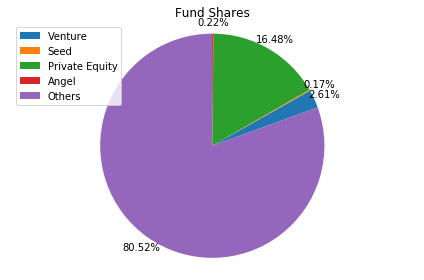

In [77]:
#Fund shares in market

labels = ['Venture','Seed','Private Equity','Angel','Others']
sizes = [avg_venture*100, avg_seed*100, avg_private_equity*100, avg_angel*100,others*100]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','green']
patches, texts,pct = plt.pie( sizes,startangle=20,autopct='%0.02f%%', pctdistance=1.1, labeldistance=1.2)
plt.legend(patches, labels, loc="best")
plt.title('Fund Shares')
plt.axis('equal')
plt.tight_layout()
plt.show()

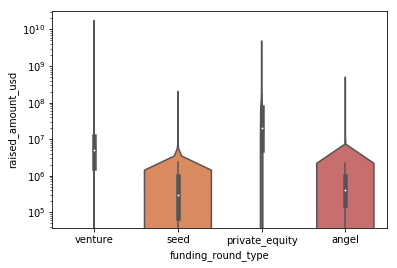

In [78]:
#Showing voilen plot for identifying target type of investment with outliers

sns.violinplot(x="funding_round_type", y="raised_amount_usd", data=master_for_plot, palette="muted")

plt.yscale('log')
plt.show()

In [79]:
count_of_types=master_for_plot.groupby('funding_round_type')['raised_amount_usd'].sum().astype('int64')
count_of_types=count_of_types.to_frame()
count_of_types.reset_index(level=0, inplace=True)
count_of_types

,funding_round_type,raised_amount_usd
0,angel,4274925121
1,private_equity,134568045021
2,seed,15774707732
3,venture,560523362596


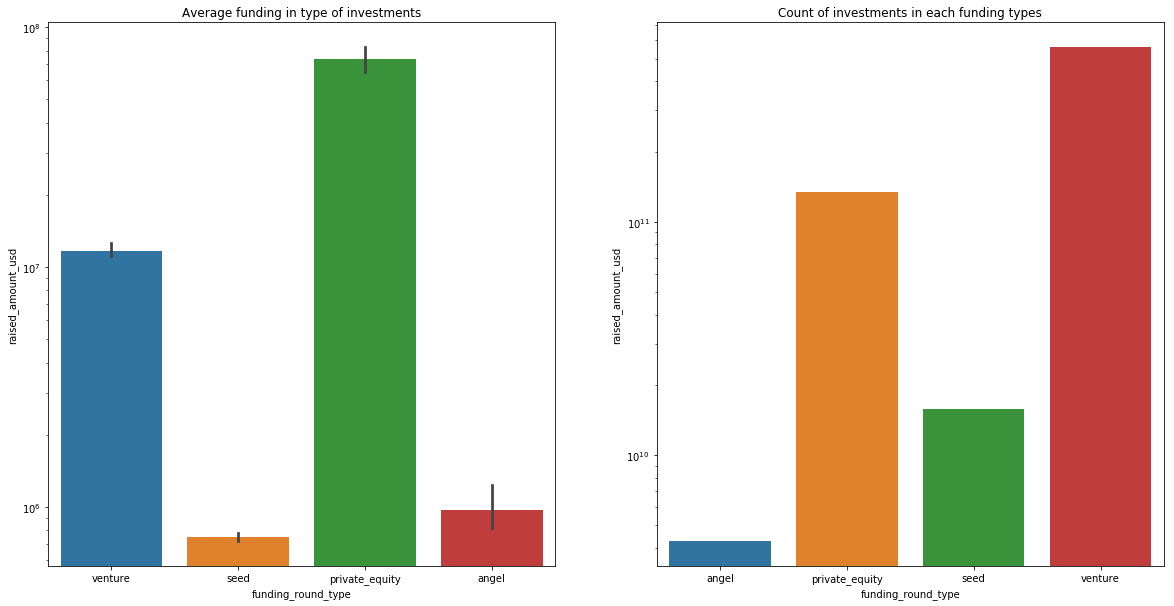

In [80]:
#Average and total investments
# Showing fraction of total investments (globally) in venture, seed, angel, and private equity and their respective counts

plt.figure(figsize=(20,10))

plt.subplot(1, 2, 1)
sns.barplot(x='funding_round_type', y='raised_amount_usd', data=master_for_plot, estimator=np.mean)
plt.title("Average funding in type of investments")
plt.yscale('log')

plt.subplot(1, 2, 2)
sns.barplot(x='funding_round_type',y='raised_amount_usd', data=count_of_types)
plt.title("Count of investments in each funding types")
plt.yscale('log')




plt.show()

In [81]:
top9.head(5)

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code,primary_sector
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND,media
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN,curated web
8,/organization/0ndine-biomedical-inc,venture,719491.0,Ondine Biomedical Inc.,Biotechnology,operating,CAN,biotechnology
10,/organization/0xdata,venture,20000000.0,H2O.ai,Analytics,operating,USA,analytics
11,/organization/0xdata,venture,1700000.0,H2O.ai,Analytics,operating,USA,analytics


In [82]:
top9_grouped.head(9)

country_code
USA    420068029342
CHN     39338918773
GBR     20072813004
IND     14261508718
CAN      9482217668
FRA      7226851352
ISR      6854350477
DEU      6306921981
JPN      3167647127
Name: raised_amount_usd, dtype: int64

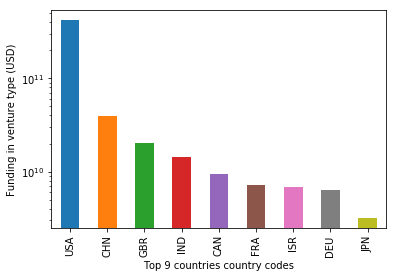

<Figure size 1440x864 with 0 Axes>

In [83]:
#Showing country with highest investment in venture type
ax = top9_grouped.head(9).plot(x='country_code', y='raised_amount_usd', kind="bar")
plt.xlabel('Top 9 countries country codes')
plt.ylabel('Funding in venture type (USD)')
plt.yscale('log')
plt.figure(num=None,figsize=(20,12))
plt.show()

In [84]:
usa_top_frame=usa_top_sectors.to_frame()
usa_top_frame['country_code']='USA'
usa_top_frame=usa_top_frame.head(3)
usa_top_frame

,raised_amount_usd,country_code
main_sector,,
Others,2950,USA
"Social, Finance, Analytics, Advertising",2714,USA
Cleantech / Semiconductors,2350,USA


In [85]:
gbr_top_frame=gbr_top_sectors.to_frame()
gbr_top_frame['country_code']='GBR'
gbr_top_frame=gbr_top_frame.head(3)
gbr_top_frame

,raised_amount_usd,country_code
main_sector,,
Others,147,GBR
"Social, Finance, Analytics, Advertising",133,GBR
Cleantech / Semiconductors,130,GBR


In [86]:
ind_top_frame=ind_top_sectors.to_frame()
ind_top_frame['country_code']='IND'
ind_top_frame=ind_top_frame.head(3)
ind_top_frame

,raised_amount_usd,country_code
main_sector,,
Others,110,IND
"Social, Finance, Analytics, Advertising",60,IND
"News, Search and Messaging",52,IND


In [87]:
#Preparing data to show number of investments in the top 3 sectors of the top 3 countries in venture type
combined=pd.concat([usa_top_frame, gbr_top_frame ,ind_top_frame])
combined.reset_index(level=0, inplace=True)
combined

,main_sector,raised_amount_usd,country_code
0,Others,2950,USA
1,"Social, Finance, Analytics, Advertising",2714,USA
2,Cleantech / Semiconductors,2350,USA
3,Others,147,GBR
4,"Social, Finance, Analytics, Advertising",133,GBR
5,Cleantech / Semiconductors,130,GBR
6,Others,110,IND
7,"Social, Finance, Analytics, Advertising",60,IND
8,"News, Search and Messaging",52,IND


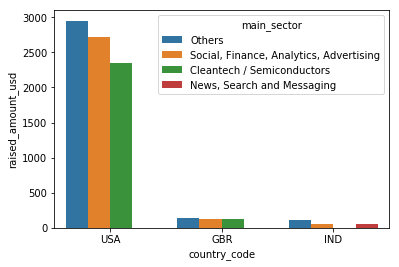

In [88]:
sns.barplot(x='country_code',y='raised_amount_usd',hue='main_sector',data=combined)
plt.show()